# IMPORT DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Set default asthetic parameters.
sns.set()

# Define path to data.
data_path = './churn_prediction_data/'
train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')

In [2]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


# check if there are NA in the dataframe


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
 13  Exited           8000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.1+ KB


In [4]:
train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5001.026625,1.569089e+07,630.804875,42.988125,4.567375,100569.286116,1.534250,0.702750,0.516875,100103.554906,0.204000
std,2879.566761,7.187306e+04,59.076984,7.515870,1.272758,31431.771836,0.582554,0.457076,0.499746,24511.460933,0.402994
min,1.000000,1.556571e+07,446.000000,28.000000,2.000000,62397.410000,1.000000,0.000000,0.000000,57522.070000,0.000000
25%,2500.750000,1.562882e+07,590.000000,38.000000,4.000000,62397.410000,1.000000,0.000000,0.000000,79216.925000,0.000000
50%,5014.000000,1.569017e+07,631.000000,42.000000,5.000000,111118.600000,1.000000,1.000000,1.000000,100056.110000,0.000000
75%,7474.250000,1.575398e+07,672.000000,47.000000,6.000000,126500.100000,2.000000,1.000000,1.000000,121104.542500,0.000000
max,9999.000000,1.581569e+07,753.000000,81.000000,7.000000,188500.680000,4.000000,1.000000,1.000000,142481.990000,1.000000


# convert Gender to binary type
# use one-hot encoding for Geopraphy

In [5]:
train['Gender'].replace(['Female','Male'],[0,1],inplace = True)
train = pd.get_dummies(train,columns = ['Geography'])
train

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,551,15806307,Trevisano,720,1,38,5,114051.97,2,0,1,107577.29,0,0,0,1
1,6897,15709621,Martin,682,0,54,4,62397.41,1,1,0,113088.60,1,1,0,0
2,4588,15619340,Palmer,672,0,31,5,119903.67,1,1,1,132925.17,0,1,0,0
3,291,15620746,Napolitani,592,0,40,4,104257.86,1,1,0,110857.33,0,0,0,1
4,1673,15646372,Yao,753,1,42,5,120387.73,1,0,1,126378.57,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,15584532,Yu,568,0,35,6,121079.60,2,1,1,124890.50,1,1,0,0
7996,5837,15606641,Liao,602,0,45,7,145846.07,1,1,0,99276.02,0,0,1,0
7997,7335,15739692,Ferri,679,0,43,5,132810.01,1,1,0,130780.85,1,0,0,1
7998,9552,15791373,Worsnop,715,1,38,4,118729.45,1,0,0,95484.52,0,1,0,0


# feature analysis
## calculate the churn rate

In [6]:
sum(train['Exited'])/len(train['Exited'])

0.204

## compare the churn rate between different country

,Geography_Spain,Exited
0,0,0.215
1,1,0.171


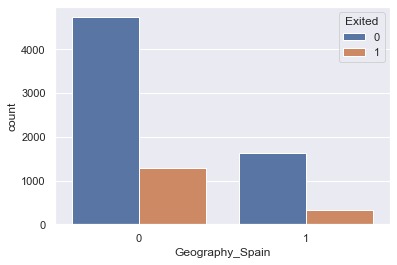

In [7]:
sns.countplot(train['Geography_Spain'], hue=train['Exited'])
display(train[["Geography_Spain", "Exited"]].groupby(['Geography_Spain'], as_index=False).mean().round(3))

,Geography_Germany,Exited
0,0,0.164
1,1,0.322


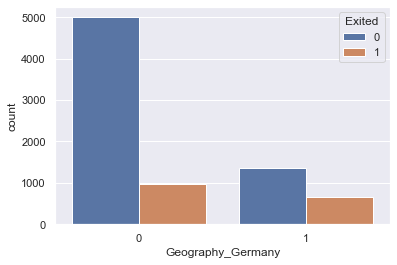

In [8]:
sns.countplot(train['Geography_Germany'], hue=train['Exited'])
display(train[["Geography_Germany", "Exited"]].groupby(['Geography_Germany'], as_index=False).mean().round(3))

,Geography_France,Exited
0,0,0.247
1,1,0.161


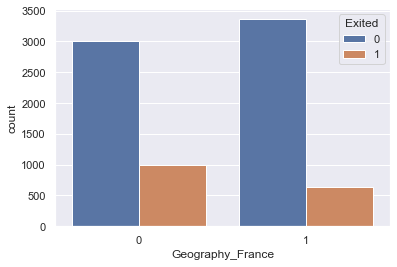

In [9]:
sns.countplot(train['Geography_France'], hue=train['Exited'])
display(train[["Geography_France", "Exited"]].groupby(['Geography_France'], as_index=False).mean().round(3))

## compare the churn rate between male and female   
## 1 represents male

,Gender,Exited
0,0,0.250
1,1,0.166


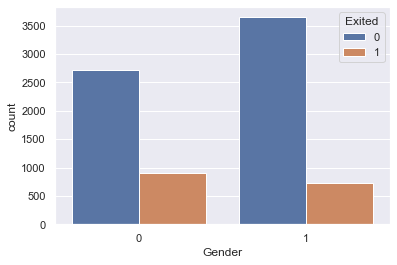

In [10]:
sns.countplot(train['Gender'], hue=train['Exited'])
display(train[["Gender", "Exited"]].groupby(['Gender'], as_index=False).mean().round(3))

## compare the churn rate(whether it is active member)

,IsActiveMember,Exited
0,0,0.270
1,1,0.142


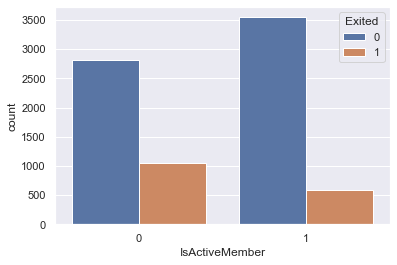

In [11]:
sns.countplot(train['IsActiveMember'], hue=train['Exited'])
display(train[["IsActiveMember", "Exited"]].groupby(['IsActiveMember'], as_index=False).mean().round(3))

## compare the churn rate(number of products)

,NumOfProducts,Exited
0,1,0.280
1,2,0.074
2,3,0.833
3,4,1.000


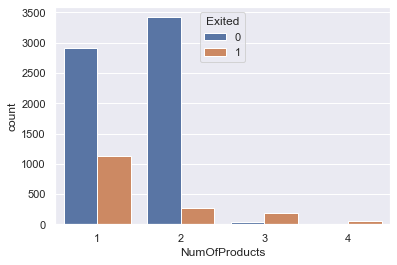

In [12]:
sns.countplot(train['NumOfProducts'], hue=train['Exited'])
display(train[["NumOfProducts", "Exited"]].groupby(['NumOfProducts'], as_index=False).mean().round(3))

## compare the churn rate(has credit card or not)

,HasCrCard,Exited
0,0,0.208
1,1,0.202


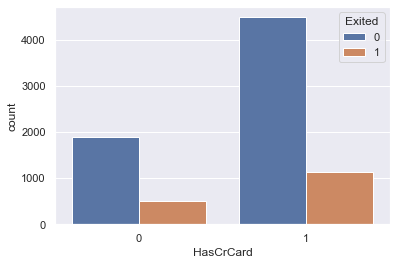

In [13]:
sns.countplot(train['HasCrCard'], hue=train['Exited'])
display(train[["HasCrCard", "Exited"]].groupby(['HasCrCard'], as_index=False).mean().round(3))

## compare the churn rate(tenure)

,Tenure,Exited
0,2,0.239
1,3,0.209
2,4,0.211
3,5,0.192
4,6,0.201
5,7,0.208


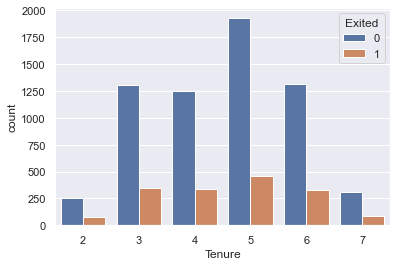

In [14]:
sns.countplot(train['Tenure'], hue=train['Exited'])
display(train[["Tenure", "Exited"]].groupby(['Tenure'], as_index=False).mean().round(3))

## Age 
## first plot ------ distribution
## second plot ----- churn rate between different age

<AxesSubplot:xlabel='Age', ylabel='Density'>

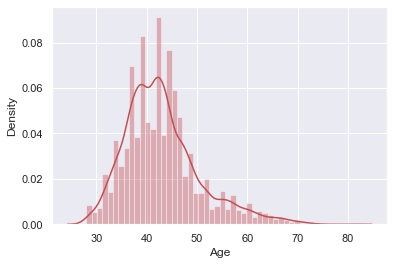

In [16]:
sns.distplot(train['Age'], color='r')

<BarContainer object of 48 artists>

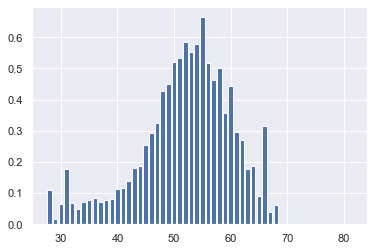

In [17]:
mean = train.groupby(['Age']).mean()['Exited']
plt.bar(mean.keys(),mean)

## Balance
## first plot ------ distribution

62397.41     2935
115409.31       2
135316.58       2
119762.61       1
142079.51       1
             ... 
133304.56       1
129584.30       1
146869.09       1
115275.09       1
104560.67       1
Name: Balance, Length: 5064, dtype: int64


<AxesSubplot:xlabel='Balance', ylabel='Density'>

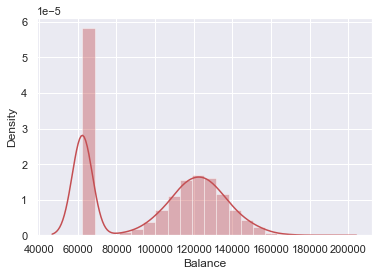

In [18]:
print(train['Balance'].value_counts())
sns.distplot(train['Balance'], color='r')

## churn rate when balance == 62397.41

In [19]:
sum(train[train['Balance']==62397.41]['Exited'])/len(train[train['Balance']==62397.41]['Exited'])

0.13662691652470188

## use qcut to cut the balance which is not equal to 62397.41
## calculate the churn rate between different balance interval

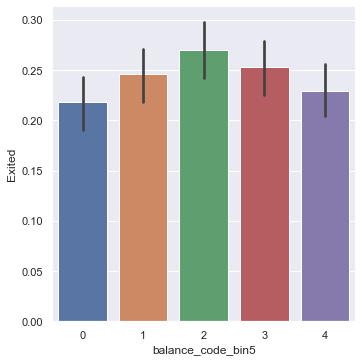

In [20]:
from sklearn.preprocessing import LabelEncoder
balance = train[train['Balance']!= 62397.41]
balance['balanceBin_5'] = pd.qcut(balance['Balance'], 5)
label = LabelEncoder()
balance['balance_code_bin5'] = label.fit_transform(balance['balanceBin_5'])

sns.factorplot(x='balance_code_bin5', y="Exited", data=balance,kind='bar')

## CreditScore
## first plot ----- distribution

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

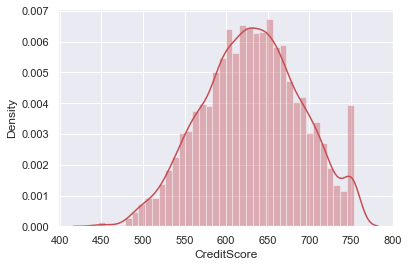

In [21]:
sns.distplot(train['CreditScore'], color='r')

## second plot ----- churn rate between different creditscore

<BarContainer object of 286 artists>

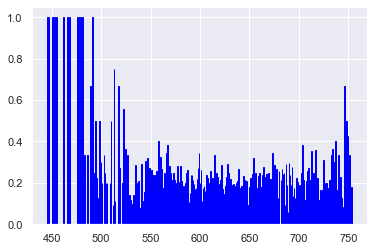

In [22]:
mean = train.groupby(['CreditScore']).mean()['Exited']
plt.bar(mean.keys(),mean,edgecolor='blue')

## Estimated Salary
## first plot ----- distribution

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

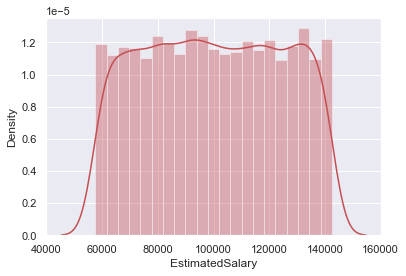

In [23]:
sns.distplot(train['EstimatedSalary'], color='r')

## second plot ----- chrun rate between different salary interval

<BarContainer object of 50 artists>

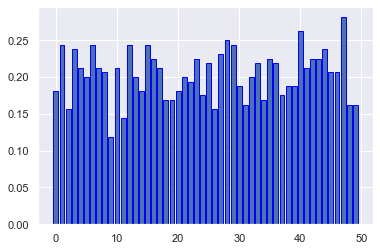

In [24]:
salary = train.copy()
salary['salaryBin_50'] = pd.qcut(salary['EstimatedSalary'], 50)
salary
salary['salarycodeBin_50'] = label.fit_transform(salary['salaryBin_50'])
mean = salary.groupby(['salarycodeBin_50']).mean()['Exited']
plt.bar(mean.keys(),mean,edgecolor='blue')                                                        

## method 1 : standardize the continuous data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['scalesalary']] = scaler.fit_transform(train[['EstimatedSalary']])
train[['scalecredit']] = scaler.fit_transform(train[['CreditScore']])
train[['scaleage']] = scaler.fit_transform(train[['Age']])
train[['scalebalance']] = scaler.fit_transform(train[['Balance']])
train

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,scalesalary,scalecredit,scaleage,scalebalance
0,551,15806307,Trevisano,720,1,38,5,114051.97,2,0,1,107577.29,0,0,0,1,0.304927,1.509906,-0.663721,0.428978
1,6897,15709621,Martin,682,0,54,4,62397.41,1,1,0,113088.60,1,1,0,0,0.529787,0.866637,1.465241,-1.214512
2,4588,15619340,Palmer,672,0,31,5,119903.67,1,1,1,132925.17,0,1,0,0,1.339115,0.697356,-1.595141,0.615161
3,291,15620746,Napolitani,592,0,40,4,104257.86,1,1,0,110857.33,0,0,0,1,0.438752,-0.656894,-0.397600,0.117359
4,1673,15646372,Yao,753,1,42,5,120387.73,1,0,1,126378.57,0,0,0,1,1.072015,2.068534,-0.131480,0.630562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,15584532,Yu,568,0,35,6,121079.60,2,1,1,124890.50,1,1,0,0,1.011302,-1.063169,-1.062901,0.652575
7996,5837,15606641,Liao,602,0,45,7,145846.07,1,1,0,99276.02,0,0,1,0,-0.033763,-0.487612,0.267700,1.440568
7997,7335,15739692,Ferri,679,0,43,5,132810.01,1,1,0,130780.85,1,0,0,1,1.251627,0.815853,0.001580,1.025801
7998,9552,15791373,Worsnop,715,1,38,4,118729.45,1,0,0,95484.52,0,1,0,0,-0.188456,1.425266,-0.663721,0.577801


## method 2 : cut the bins manually

In [26]:
bins_age = [0, 38, 42, 47,99]
bins_creditscore = [0,590,631,672,1000]
bins_salary = [0,79217,100056,121105,200000]
bins_balance = [62397,62398,200000]
mylabel = ['1', '2', '3', '4']
mylabel2 = ['0','1']
train['age level'] = pd.cut(train['Age'], bins_age, include_lowest=True, labels=mylabel)
train['creditscorelevel'] = pd.cut(train['CreditScore'], bins_creditscore, include_lowest=True, labels=mylabel)
train['salarylevel'] = pd.cut(train['EstimatedSalary'], bins_salary, include_lowest=True, labels=mylabel)
train['balancelevel'] = pd.cut(train['Balance'], bins_balance, include_lowest=True, labels=mylabel2)
train

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Geography_Germany,Geography_Spain,scalesalary,scalecredit,scaleage,scalebalance,age level,creditscorelevel,salarylevel,balancelevel
0,551,15806307,Trevisano,720,1,38,5,114051.97,2,0,...,0,1,0.304927,1.509906,-0.663721,0.428978,1,4,3,1
1,6897,15709621,Martin,682,0,54,4,62397.41,1,1,...,0,0,0.529787,0.866637,1.465241,-1.214512,4,4,3,0
2,4588,15619340,Palmer,672,0,31,5,119903.67,1,1,...,0,0,1.339115,0.697356,-1.595141,0.615161,1,3,4,1
3,291,15620746,Napolitani,592,0,40,4,104257.86,1,1,...,0,1,0.438752,-0.656894,-0.397600,0.117359,2,2,3,1
4,1673,15646372,Yao,753,1,42,5,120387.73,1,0,...,0,1,1.072015,2.068534,-0.131480,0.630562,2,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,15584532,Yu,568,0,35,6,121079.60,2,1,...,0,0,1.011302,-1.063169,-1.062901,0.652575,1,1,4,1
7996,5837,15606641,Liao,602,0,45,7,145846.07,1,1,...,1,0,-0.033763,-0.487612,0.267700,1.440568,3,2,2,1
7997,7335,15739692,Ferri,679,0,43,5,132810.01,1,1,...,0,1,1.251627,0.815853,0.001580,1.025801,3,4,4,1
7998,9552,15791373,Worsnop,715,1,38,4,118729.45,1,0,...,0,0,-0.188456,1.425266,-0.663721,0.577801,1,4,2,1


## implement train test split
## model: random forest
### features: 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Geography_France', 'Geography_Germany'
### ,'Geography_Spain',"agelevel","creditscorelevel","balancelevel","salarylevel"

In [27]:
try_train = train[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance','EstimatedSalary','Gender', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Geography_France', 'Geography_Germany',
       'Geography_Spain']]
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(try_train,train['Exited'])
bins_age = [0, 38, 42, 47,99]
bins_creditscore = [0,590,631,672,1000]
bins_salary = [0,79217,100056,121105,200000]
bins_balance = [62397,62398,200000]
mylabel = ['1', '2', '3', '4']
mylabel2 = ['0','1']
train_data['age level'] = pd.cut(train_data['Age'], bins_age, include_lowest=True, labels=mylabel)
train_data['creditscorelevel'] = pd.cut(train_data['CreditScore'], bins_creditscore, include_lowest=True, labels=mylabel)
train_data['salarylevel'] = pd.cut(train_data['EstimatedSalary'], bins_salary, include_lowest=True, labels=mylabel)
train_data['balancelevel'] = pd.cut(train_data['Balance'], bins_balance, include_lowest=True, labels=mylabel2)
test_data['age level'] = pd.cut(test_data['Age'], bins_age, include_lowest=True, labels=mylabel)
test_data['creditscorelevel'] = pd.cut(test_data['CreditScore'], bins_creditscore, include_lowest=True, labels=mylabel)
test_data['salarylevel'] = pd.cut(test_data['EstimatedSalary'], bins_salary, include_lowest=True, labels=mylabel)
test_data['balancelevel'] = pd.cut(test_data['Balance'], bins_balance, include_lowest=True, labels=mylabel2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['scalesalary']] = scaler.fit_transform(train_data[['EstimatedSalary']])
train_data[['scalecredit']] = scaler.fit_transform(train_data[['CreditScore']])
train_data[['scaleage']] = scaler.fit_transform(train_data[['Age']])
train_data[['scalebalance']] = scaler.fit_transform(train_data[['Balance']])
test_data[['scalesalary']] = scaler.fit_transform(test_data[['EstimatedSalary']])
test_data[['scalecredit']] = scaler.fit_transform(test_data[['CreditScore']])
test_data[['scaleage']] = scaler.fit_transform(test_data[['Age']])
test_data[['scalebalance']] = scaler.fit_transform(test_data[['Balance']])
train_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Balance,EstimatedSalary,Gender,Tenure,NumOfProducts,...,Geography_Germany,Geography_Spain,age level,creditscorelevel,salarylevel,balancelevel,scalesalary,scalecredit,scaleage,scalebalance
5090,3225,15713094,Giles,695,34,62397.41,124613.33,1,6,2,...,0,0,1,4,4,0,1.007333,1.083671,-1.195278,-1.214316
7061,8298,15714789,Yobachi,507,39,62397.41,124129.07,0,6,2,...,0,1,2,1,4,0,0.987457,-2.104296,-0.530027,-1.214316
4711,1075,15813451,Fuller,609,35,115258.65,70192.42,0,7,1,...,1,0,1,2,1,1,-1.226317,-0.374654,-1.062228,0.465307
7058,6321,15616028,Abramowitz,655,54,62397.41,62975.33,1,5,1,...,0,0,4,3,1,0,-1.522535,0.405381,1.465724,-1.214316
7299,5013,15785078,Okwukwe,614,32,62397.41,113773.89,0,5,2,...,0,0,1,2,3,0,0.562439,-0.289868,-1.461378,-1.214316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,1006,15572735,Baranov,658,32,62397.41,117740.93,0,3,2,...,0,0,1,3,3,0,0.725263,0.456252,-1.461378,-1.214316
7563,5854,15714006,Mouzon,684,40,113535.13,93707.35,1,5,1,...,1,0,2,4,2,1,-0.261171,0.897141,-0.396977,0.410544
5365,3766,15773017,Farmer,542,37,118483.22,121258.97,1,6,1,...,1,0,1,1,4,1,0.869657,-1.510791,-0.796128,0.567765
3765,6791,15680597,Chukwufumnanya,667,32,114215.83,131132.02,0,5,2,...,1,0,1,3,4,1,1.274886,0.608868,-1.461378,0.432172


## Finding best Parameters for Model for Different Feature Selection
### All Features

In [28]:
from sklearn.model_selection import GridSearchCV
x_train = train_data[['Gender','Tenure','NumOfProducts','HasCrCard',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'age level', 'creditscorelevel', 'salarylevel',
       'balancelevel']].values
y_train = train_labels.values
y_test = test_labels.values
x_test = test_data[['Gender','Tenure','NumOfProducts','HasCrCard',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'age level', 'creditscorelevel', 'salarylevel',
       'balancelevel']].values
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train,y_train)
print(RanFor_grid.best_params_)

{'max_depth': 6, 'max_features': 7, 'min_samples_split': 7, 'n_estimators': 100}


## Show Results

In [29]:
par = list(RanFor_grid.best_params_.values())
model = RandomForestClassifier(max_depth = par[0],max_features = par[1],min_samples_split = par[2],n_estimators = par[3])
model.fit(x_train,y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1594
           1       0.81      0.41      0.55       406

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



### drop Tenure 
### drop has creditcard

In [30]:
x_train = train_data[['Gender','NumOfProducts',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'age level', 'creditscorelevel', 'salarylevel',
       'balancelevel']].values
y_train = train_labels.values
y_test = test_labels.values
x_test = test_data[['Gender','NumOfProducts',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'age level', 'creditscorelevel', 'salarylevel',
       'balancelevel']].values
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train,y_train)
print(RanFor_grid.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 100}


## Show Results

In [31]:
par = list(RanFor_grid.best_params_.values())
model = RandomForestClassifier(max_depth = par[0],max_features = par[1],min_samples_split = par[2],n_estimators = par[3])
model.fit(x_train,y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1594
           1       0.82      0.39      0.53       406

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



### features : 'Gender','Tenure','NumOfProducts','HasCrCard',
###       'IsActiveMember', 'Geography_France', 'Geography_Germany',
###       'Geography_Spain', 'scaleage', 'scalecredit', 'scalesalary',
###       'scalebalance'

In [32]:
from sklearn.model_selection import GridSearchCV
x_train = train_data[['Gender','Tenure','NumOfProducts','HasCrCard',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'scaleage', 'scalecredit', 'scalesalary',
       'scalebalance']].values
y_train = train_labels.values
y_test = test_labels.values
x_test = test_data[['Gender','Tenure','NumOfProducts','HasCrCard',
       'IsActiveMember', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'scaleage', 'scalecredit', 'scalesalary',
       'scalebalance']].values
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(x_train,y_train)
print(RanFor_grid.best_params_)

{'max_depth': 6, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 100}


## Show Results

In [33]:
par = list(RanFor_grid.best_params_.values())
model3 = RandomForestClassifier(max_depth = par[0],max_features = par[1],min_samples_split = par[2],n_estimators = par[3])
model3.fit(x_train,y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1594
           1       0.81      0.44      0.57       406

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Trying Different ML Algorithms For Submission

### Import Libraries and Preprocess Data

In [36]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# read data
df_train_1 = pd.read_csv('churn_dataset_Bank.csv')
data_path = './churn_prediction_data/'
df_train_2 = pd.read_csv(data_path+'train.csv')
df_test = pd.read_csv(data_path+'test.csv')

# preprocess data
x_1 = df_train_1[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'Tenure', 'NumOfProducts',  'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x_1['Geography'] = x_1['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2])
x_1['Gender'] = x_1['Gender'].replace(['Male', 'Female'], [0, 1])
# x_1 = x_1.values
y_1 = df_train_1['Exited']

x_2 = df_train_2[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'Tenure', 'NumOfProducts',  'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x_2['Geography'] = x_2['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2])
x_2['Gender'] = x_2['Gender'].replace(['Male', 'Female'], [0, 1])
# x_2 = x_2.values
y_2 = df_train_2['Exited']

# concatenate train1 and train2
x = pd.concat([x_1, x_2]).values
y = pd.concat([y_1, y_2]).values

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10, stratify=y)

x_train = x
y_train = y

# preprocess data for submission
x_test = df_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'Tenure', 'NumOfProducts',  'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x_test['Geography'] = x_test['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2])
x_test['Gender'] = x_test['Gender'].replace(['Male', 'Female'], [0, 1])
x_test = x_test.values

# Show Pearson Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(x_1.corr(), annot=True)
x_test['Geography']

# standardize data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train_stdnorm = scaler.transform(x_train)
x_test_stdnorm = scaler.transform(x_test)

# Train Data

## Random Forest

In [38]:
clf = RandomForestClassifier(n_estimators=650, oob_score=True, max_features=6)

X = x_train_stdnorm.copy()
y = y_train.copy()
x_t = x_test_stdnorm.copy()

clf.fit(X, y)
y_predict = clf.predict(x_t)

df_RF = pd.DataFrame({'RowNumber': df_test['RowNumber'], 'Exited': list(y_predict)})
df_RF

## Extra Trees (Had the Best Results!!) 

In [39]:
clf = ExtraTreesClassifier(n_estimators=35, max_depth=None, min_samples_split=6, random_state=0)
X = x_train_stdnorm.copy()
y = y_train.copy()
x_t = x_test_stdnorm.copy()

clf.fit(X, y)
y_predict = clf.predict(x_t)

df_ET = pd.DataFrame({'RowNumber': df_test['RowNumber'], 'Exited': list(y_predict)})
df_ET

## XGBoost

In [40]:
clf = XGBClassifier(max_depth=10, eta=0.01, subsample = 1, colsample_bytree = 0.75, reg_alpha = 0.05)
X = x_train_stdnorm.copy()
y = y_train.copy()
x_t = x_test_stdnorm.copy()

clf.fit(X, y)
y_predict = clf.predict(x_t)

df_XGB = pd.DataFrame({'RowNumber': df_test['RowNumber'], 'Exited': list(y_predict)})
df_XGB

## AdaBoost

In [41]:
clf = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=35,max_depth=None, min_samples_split=7), n_estimators=60,learning_rate=0.5)
X = x_train_stdnorm.copy()
y = y_train.copy()
x_t = x_test_stdnorm.copy()

clf.fit(X, y)
y_predict = clf.predict(x_t)

df_Ada = pd.DataFrame({'RowNumber': df_test['RowNumber'], 'Exited': list(y_predict)})
df_Ada

## Write df into csv for submission

In [ ]:
# df = df_RF
# df = df_ET
# df = df_XGB
# df = df_Ada
# str_csv = df.to_csv(r'./submit.csv',columns=['RowNumber','Exited'],index=True,sep=',')